In [1]:
from torch import nn, optim, max, utils, cuda
from torchvision import transforms, datasets, utils as u
import numpy as np
import matplotlib.pyplot as plt

cuda.is_available()

True

In [2]:
train_dataset = datasets.CIFAR10(root='./data',
                                 train=True,
                                 transform=transforms.ToTensor(),
                                 download=True)

Files already downloaded and verified


In [3]:
image, label = train_dataset[0]
image.size()

torch.Size([3, 32, 32])

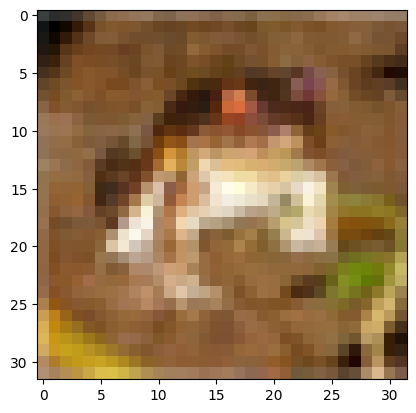

In [4]:
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show() # frog

In [5]:
train_loader = utils.data.DataLoader(dataset=train_dataset,
                                     batch_size=300,
                                     shuffle=True)

In [6]:
test_dataset = datasets.CIFAR10(root='./data',
                                train=False,
                                download=True,
                                transform=transforms.ToTensor())

Files already downloaded and verified


In [7]:
test_loader = utils.data.DataLoader(dataset=test_dataset,
                                    batch_size=8,
                                    shuffle=False)

In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
3 * 32 * 32

3072

In [10]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim * 10)
        self.fc2 = nn.Linear(hidden_dim * 10, hidden_dim * 8)
        self.fc3 = nn.Linear(hidden_dim * 8, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = nn.functional.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = nn.functional.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = nn.functional.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = nn.functional.leaky_relu(x, 0.05)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = nn.functional.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = nn.functional.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = nn.functional.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = nn.functional.softmax(x)
        return x

net = Net(3072, 100, 10)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [12]:
from tqdm import tqdm

In [13]:
for epoch in tqdm(range(70)):
    running_loss = 0.0
    total_correct = 0
    total_samples = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        if i % 150 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    accuracy = total_correct / total_samples
    print(f'Accuracy: {(accuracy * 100):.2f}%\n')

print('Training is finished!')

  0%|          | 0/70 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   151] loss: 0.161


  1%|▏         | 1/70 [00:14<17:00, 14.79s/it]

Accuracy: 21.06%

[2,     1] loss: 0.001
[2,   151] loss: 0.133


  3%|▎         | 2/70 [00:29<16:45, 14.78s/it]

Accuracy: 36.98%

[3,     1] loss: 0.001
[3,   151] loss: 0.124


  4%|▍         | 3/70 [00:44<16:30, 14.78s/it]

Accuracy: 41.08%

[4,     1] loss: 0.001
[4,   151] loss: 0.117


  6%|▌         | 4/70 [00:59<16:17, 14.81s/it]

Accuracy: 44.26%

[5,     1] loss: 0.001
[5,   151] loss: 0.114


  7%|▋         | 5/70 [01:14<16:14, 14.99s/it]

Accuracy: 45.87%

[6,     1] loss: 0.001
[6,   151] loss: 0.110


  9%|▊         | 6/70 [01:29<15:59, 14.99s/it]

Accuracy: 47.77%

[7,     1] loss: 0.001
[7,   151] loss: 0.107


 10%|█         | 7/70 [01:44<15:42, 14.97s/it]

Accuracy: 48.97%

[8,     1] loss: 0.001
[8,   151] loss: 0.104


 11%|█▏        | 8/70 [01:59<15:26, 14.95s/it]

Accuracy: 50.04%

[9,     1] loss: 0.001
[9,   151] loss: 0.102


 13%|█▎        | 9/70 [02:14<15:10, 14.93s/it]

Accuracy: 51.50%

[10,     1] loss: 0.001
[10,   151] loss: 0.100


 14%|█▍        | 10/70 [02:30<15:26, 15.44s/it]

Accuracy: 52.42%

[11,     1] loss: 0.001
[11,   151] loss: 0.097


 16%|█▌        | 11/70 [02:46<15:22, 15.63s/it]

Accuracy: 53.91%

[12,     1] loss: 0.001
[12,   151] loss: 0.094


 17%|█▋        | 12/70 [03:02<15:07, 15.64s/it]

Accuracy: 54.98%

[13,     1] loss: 0.001
[13,   151] loss: 0.092


 19%|█▊        | 13/70 [03:18<14:51, 15.65s/it]

Accuracy: 55.77%

[14,     1] loss: 0.001
[14,   151] loss: 0.090


 20%|██        | 14/70 [03:33<14:34, 15.62s/it]

Accuracy: 57.09%

[15,     1] loss: 0.001
[15,   151] loss: 0.088


 21%|██▏       | 15/70 [03:48<14:08, 15.43s/it]

Accuracy: 57.84%

[16,     1] loss: 0.001
[16,   151] loss: 0.085


 23%|██▎       | 16/70 [04:03<13:44, 15.26s/it]

Accuracy: 59.26%

[17,     1] loss: 0.001
[17,   151] loss: 0.083


 24%|██▍       | 17/70 [04:18<13:22, 15.14s/it]

Accuracy: 60.38%

[18,     1] loss: 0.001
[18,   151] loss: 0.081


 26%|██▌       | 18/70 [04:33<13:07, 15.14s/it]

Accuracy: 61.49%

[19,     1] loss: 0.001
[19,   151] loss: 0.079


 27%|██▋       | 19/70 [04:48<12:54, 15.19s/it]

Accuracy: 62.14%

[20,     1] loss: 0.000
[20,   151] loss: 0.077


 29%|██▊       | 20/70 [05:04<12:39, 15.18s/it]

Accuracy: 63.54%

[21,     1] loss: 0.000
[21,   151] loss: 0.075


 30%|███       | 21/70 [05:19<12:20, 15.12s/it]

Accuracy: 64.27%

[22,     1] loss: 0.000
[22,   151] loss: 0.072


 31%|███▏      | 22/70 [05:34<12:04, 15.10s/it]

Accuracy: 65.70%

[23,     1] loss: 0.000
[23,   151] loss: 0.069


 33%|███▎      | 23/70 [05:49<11:49, 15.09s/it]

Accuracy: 66.72%

[24,     1] loss: 0.000
[24,   151] loss: 0.067


 34%|███▍      | 24/70 [06:04<11:37, 15.15s/it]

Accuracy: 67.91%

[25,     1] loss: 0.000
[25,   151] loss: 0.065


 36%|███▌      | 25/70 [06:19<11:23, 15.19s/it]

Accuracy: 68.77%

[26,     1] loss: 0.000
[26,   151] loss: 0.062


 37%|███▋      | 26/70 [06:34<11:05, 15.13s/it]

Accuracy: 69.99%

[27,     1] loss: 0.000
[27,   151] loss: 0.060


 39%|███▊      | 27/70 [06:49<10:49, 15.10s/it]

Accuracy: 71.44%

[28,     1] loss: 0.000
[28,   151] loss: 0.057


 40%|████      | 28/70 [07:04<10:34, 15.11s/it]

Accuracy: 72.77%

[29,     1] loss: 0.000
[29,   151] loss: 0.056


 41%|████▏     | 29/70 [07:19<10:18, 15.10s/it]

Accuracy: 73.30%

[30,     1] loss: 0.000
[30,   151] loss: 0.054


 43%|████▎     | 30/70 [07:34<10:02, 15.06s/it]

Accuracy: 74.52%

[31,     1] loss: 0.000
[31,   151] loss: 0.050


 44%|████▍     | 31/70 [07:50<09:47, 15.07s/it]

Accuracy: 76.01%

[32,     1] loss: 0.000
[32,   151] loss: 0.049


 46%|████▌     | 32/70 [08:07<09:55, 15.67s/it]

Accuracy: 76.81%

[33,     1] loss: 0.000
[33,   151] loss: 0.046


 47%|████▋     | 33/70 [08:23<09:50, 15.97s/it]

Accuracy: 77.86%

[34,     1] loss: 0.000
[34,   151] loss: 0.045


 49%|████▊     | 34/70 [08:39<09:31, 15.87s/it]

Accuracy: 78.50%

[35,     1] loss: 0.000
[35,   151] loss: 0.043


 50%|█████     | 35/70 [08:54<09:07, 15.65s/it]

Accuracy: 79.43%

[36,     1] loss: 0.000
[36,   151] loss: 0.041


 51%|█████▏    | 36/70 [09:10<08:52, 15.66s/it]

Accuracy: 80.21%

[37,     1] loss: 0.000
[37,   151] loss: 0.038


 53%|█████▎    | 37/70 [09:25<08:35, 15.64s/it]

Accuracy: 82.17%

[38,     1] loss: 0.000
[38,   151] loss: 0.037


 54%|█████▍    | 38/70 [09:41<08:16, 15.51s/it]

Accuracy: 82.22%

[39,     1] loss: 0.000
[39,   151] loss: 0.035


 56%|█████▌    | 39/70 [09:56<08:00, 15.51s/it]

Accuracy: 82.98%

[40,     1] loss: 0.000
[40,   151] loss: 0.034


 57%|█████▋    | 40/70 [10:12<07:46, 15.56s/it]

Accuracy: 83.60%

[41,     1] loss: 0.000
[41,   151] loss: 0.032


 59%|█████▊    | 41/70 [10:28<07:35, 15.70s/it]

Accuracy: 84.41%

[42,     1] loss: 0.000
[42,   151] loss: 0.030


 60%|██████    | 42/70 [10:43<07:15, 15.56s/it]

Accuracy: 85.43%

[43,     1] loss: 0.000
[43,   151] loss: 0.031


 61%|██████▏   | 43/70 [10:58<06:55, 15.38s/it]

Accuracy: 84.77%

[44,     1] loss: 0.000
[44,   151] loss: 0.030


 63%|██████▎   | 44/70 [11:13<06:38, 15.31s/it]

Accuracy: 85.58%

[45,     1] loss: 0.000
[45,   151] loss: 0.027


 64%|██████▍   | 45/70 [11:29<06:24, 15.37s/it]

Accuracy: 86.77%

[46,     1] loss: 0.000
[46,   151] loss: 0.025


 66%|██████▌   | 46/70 [11:44<06:09, 15.38s/it]

Accuracy: 88.13%

[47,     1] loss: 0.000
[47,   151] loss: 0.026


 67%|██████▋   | 47/70 [11:59<05:52, 15.33s/it]

Accuracy: 87.68%

[48,     1] loss: 0.000
[48,   151] loss: 0.025


 69%|██████▊   | 48/70 [12:14<05:36, 15.29s/it]

Accuracy: 88.16%

[49,     1] loss: 0.000
[49,   151] loss: 0.022


 70%|███████   | 49/70 [12:30<05:20, 15.26s/it]

Accuracy: 89.48%

[50,     1] loss: 0.000
[50,   151] loss: 0.023


 71%|███████▏  | 50/70 [12:45<05:04, 15.21s/it]

Accuracy: 88.73%

[51,     1] loss: 0.000
[51,   151] loss: 0.023


 73%|███████▎  | 51/70 [13:00<04:47, 15.14s/it]

Accuracy: 89.19%

[52,     1] loss: 0.000
[52,   151] loss: 0.021


 74%|███████▍  | 52/70 [13:15<04:32, 15.16s/it]

Accuracy: 89.85%

[53,     1] loss: 0.000
[53,   151] loss: 0.022


 76%|███████▌  | 53/70 [13:30<04:17, 15.17s/it]

Accuracy: 89.44%

[54,     1] loss: 0.000
[54,   151] loss: 0.020


 77%|███████▋  | 54/70 [13:45<04:02, 15.15s/it]

Accuracy: 90.31%

[55,     1] loss: 0.000
[55,   151] loss: 0.019


 79%|███████▊  | 55/70 [14:00<03:47, 15.18s/it]

Accuracy: 90.74%

[56,     1] loss: 0.000
[56,   151] loss: 0.019


 80%|████████  | 56/70 [14:16<03:32, 15.21s/it]

Accuracy: 90.71%

[57,     1] loss: 0.000
[57,   151] loss: 0.017


 81%|████████▏ | 57/70 [14:31<03:18, 15.26s/it]

Accuracy: 91.73%

[58,     1] loss: 0.000
[58,   151] loss: 0.019


 83%|████████▎ | 58/70 [14:46<03:03, 15.26s/it]

Accuracy: 90.92%

[59,     1] loss: 0.000
[59,   151] loss: 0.018


 84%|████████▍ | 59/70 [15:02<02:48, 15.35s/it]

Accuracy: 91.60%

[60,     1] loss: 0.000
[60,   151] loss: 0.017


 86%|████████▌ | 60/70 [15:17<02:33, 15.36s/it]

Accuracy: 91.99%

[61,     1] loss: 0.000
[61,   151] loss: 0.016


 87%|████████▋ | 61/70 [15:33<02:18, 15.40s/it]

Accuracy: 92.31%

[62,     1] loss: 0.000
[62,   151] loss: 0.017


 89%|████████▊ | 62/70 [15:48<02:03, 15.42s/it]

Accuracy: 91.69%

[63,     1] loss: 0.000
[63,   151] loss: 0.017


 90%|█████████ | 63/70 [16:03<01:47, 15.36s/it]

Accuracy: 92.07%

[64,     1] loss: 0.000
[64,   151] loss: 0.014


 91%|█████████▏| 64/70 [16:19<01:31, 15.32s/it]

Accuracy: 93.39%

[65,     1] loss: 0.000
[65,   151] loss: 0.016


 93%|█████████▎| 65/70 [16:34<01:16, 15.37s/it]

Accuracy: 92.24%

[66,     1] loss: 0.000
[66,   151] loss: 0.015


 94%|█████████▍| 66/70 [16:50<01:01, 15.36s/it]

Accuracy: 92.91%

[67,     1] loss: 0.000
[67,   151] loss: 0.015


 96%|█████████▌| 67/70 [17:05<00:46, 15.38s/it]

Accuracy: 92.91%

[68,     1] loss: 0.000
[68,   151] loss: 0.015


 97%|█████████▋| 68/70 [17:20<00:30, 15.37s/it]

Accuracy: 92.98%

[69,     1] loss: 0.000
[69,   151] loss: 0.014


 99%|█████████▊| 69/70 [17:35<00:15, 15.32s/it]

Accuracy: 93.27%

[70,     1] loss: 0.000
[70,   151] loss: 0.014


100%|██████████| 70/70 [17:51<00:00, 15.30s/it]

Accuracy: 93.22%

Training is finished!


In [14]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  cat ship ship plane frog frog car frog


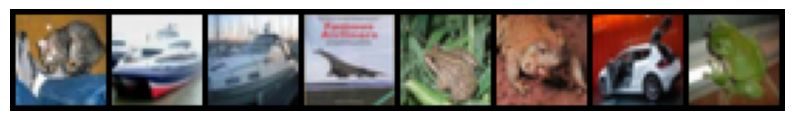

In [15]:
net.eval()
outputs = net(images)
imgs = u.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
plt.axis('off')
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))
plt.show()

In [16]:
net.predict(images)

C:\Users\grayni\AppData\Local\Temp\ipykernel_11324\1812228339.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = nn.functional.softmax(x)


tensor([[4.6931e-09, 4.4585e-10, 1.0281e-09, 9.3687e-01, 6.2304e-02, 2.8604e-06,
         2.6948e-14, 9.1951e-11, 7.4769e-04, 7.1653e-05],
        [4.3807e-05, 3.7417e-09, 3.0113e-13, 3.2269e-19, 2.9078e-15, 9.3332e-04,
         6.3948e-17, 1.9706e-05, 9.9754e-01, 1.4680e-03],
        [6.5449e-01, 2.4904e-04, 3.0382e-08, 2.1893e-14, 1.9231e-12, 4.9066e-14,
         1.3198e-19, 2.1484e-06, 3.4511e-01, 1.4826e-04],
        [8.0028e-01, 4.7285e-05, 7.7834e-03, 6.6571e-08, 3.3535e-02, 7.9586e-12,
         2.9488e-12, 1.5560e-01, 1.6557e-03, 1.0952e-03],
        [8.3609e-12, 1.8960e-20, 2.3671e-04, 5.6404e-02, 4.6107e-01, 5.2106e-08,
         4.8229e-01, 3.4251e-08, 6.7561e-11, 3.4927e-16],
        [9.2000e-06, 2.3394e-06, 1.3143e-03, 3.4180e-03, 3.0291e-03, 4.5955e-03,
         9.8763e-01, 2.1664e-06, 4.5306e-09, 1.2274e-11],
        [1.4511e-17, 1.0000e+00, 5.7887e-08, 1.1095e-07, 2.2030e-30, 9.0179e-13,
         6.0912e-07, 1.2252e-14, 3.1885e-08, 5.8416e-08],
        [1.0866e-11, 3.1604

In [17]:
_, predicted = max(outputs, 1)
predicted

tensor([3, 8, 0, 0, 6, 6, 1, 2])

In [18]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'plane' 'plane' 'frog' 'frog' 'car' 'bird']
